In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_profiles = pd.read_csv("C:\TEMPproject\Projecty\okcupid_profiles.csv") 

In [60]:
df_profiles.head(1)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...


In [ ]:
for col in df_profiles.columns: 
    print(col)
    

In [6]:
print('age.median = ', df_profiles['age'].median())
print('age.mean = ', df_profiles['age'].mean())
print('age.std = ', df_profiles['age'].std())

age.median =  30.0
age.mean =  32.3402895939679
age.std =  9.452779096971224


In [7]:
print('height.median = ', df_profiles['height'].median())
print('height.mean = ', df_profiles['height'].mean())
print('height.std = ', df_profiles['height'].std())
print('\n*in feet')

height.median =  68.0
height.mean =  68.29528051649066
height.std =  3.994803134655344

*in feet


In [14]:
income_stated = df_profiles['income'] != -1

In [15]:
print('raw data on yearly income looks like this:\n')

print('income.median = ', df_profiles.loc[income_stated, 'income'].median())
print('income.mean = ', df_profiles.loc[income_stated, 'income'].mean())
print('income.std = ', df_profiles.loc[income_stated, 'income'].std())
print('\n*for those who stated their income')

raw data on yearly income looks like this:

income.median =  50000.0
income.mean =  104394.99304589708
income.std =  201433.5283072594

*for those who stated their income


In [13]:
income_upper_bound = df_profiles['income'] < 400000 
income_lower_bound = df_profiles['income'] >= 0

In [16]:
print('''however, I find the possibility of yearly
income of more than $400000 questionable,
so I decided to put some restrictions to it:\n''')

print('income.median = ', df_profiles.loc[income_upper_bound & income_lower_bound, 'income'].median())
print('income.mean = ', df_profiles.loc[income_upper_bound & income_lower_bound, 'income'].mean())
print('income.std = ', df_profiles.loc[income_upper_bound & income_lower_bound, 'income'].std())

however, I find the possibility of yearly
income of more than $400000 questionable,
so I decided to put some restrictions to it:

income.median =  50000.0
income.mean =  59987.19707361683
income.std =  42516.20185004863


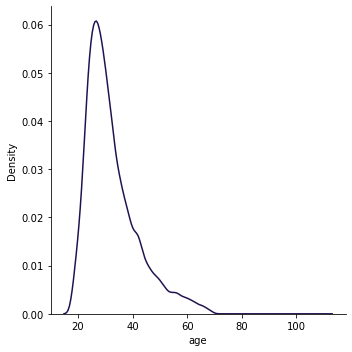

In [56]:
sns.displot(df_profiles, x = 'age', kind = 'kde')

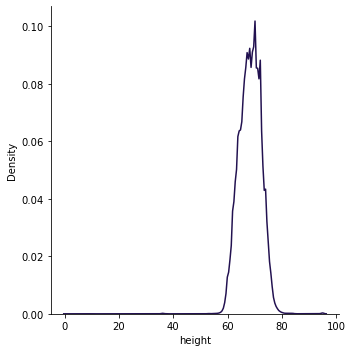

In [57]:
sns.displot(df_profiles, x = 'height', kind = 'kde')

raw data on yearly income looks like this:


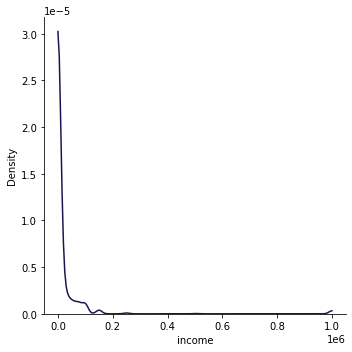

In [58]:
print('raw data on yearly income looks like this:')
sns.displot(df_profiles, x = 'income', kind = 'kde', cut = 0)


however, I find the possibility of yearly 
income of more than $400000 questionable,
so I decided to put some restrictions to it:


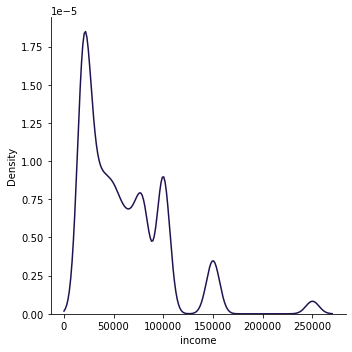

In [59]:
print('''\nhowever, I find the possibility of yearly 
income of more than $400000 questionable,
so I decided to put some restrictions to it:''')
sns.displot(df_profiles.loc[income_upper_bound & income_lower_bound], x = 'income', kind = 'kde')

In [10]:
print('''How does the income differ depending on orientation:\n''')

person_gay = df_profiles['orientation'] == 'gay'
              
person_straight =  df_profiles['orientation'] == 'straight'


print('avg income gay =', df_profiles.loc[person_gay & income_upper_bound & income_lower_bound, 'income'].mean())
print('avg income straight =', df_profiles.loc[person_straight & income_upper_bound & income_lower_bound, 'income'].mean())

How does the income differ depending on orientation:

avg income gay = 46546.39175257732
avg income straight = 62464.01001460463


In [7]:
print('''How does the height differ depending on sex:\n''')

person_male = df_profiles['sex'] == 'm'
              
person_female =  df_profiles['sex'] == 'f'


print('avg height male =', df_profiles.loc[person_male, 'height'].mean())
print('avg height female =', df_profiles.loc[person_female, 'height'].mean())

How does the height differ depending on sex:

avg height male = 70.4434923381807
avg height female = 65.1038729474208


In this project I decided to have a glimpse at the data of almost 60 000 anonymous users in OkCupid - one of the top 5 most popular dating apps in the US. I decided to focus the research on three numerical fields of the dataset: age, height, and income.
Minding the data we can evaluate the average user of OkCupid: a person in their early thirties (32 as the mean value states it), with an income fluctuating around $60 000, 5 feet 8 inches tall.
However, I find the income data hihgly doubtable, as it was provided by users and there may be some significant missevaluations due to that.

Speaking of income, I had a chance to estmate it's average value depending on one's orientation. As it turns out, members of the LGBTQ community make on average $16 000 a year less. Or they're more frank about their wages, we'll never find out. 
Finally, I investigated how tall the users of the app were depending on their sex. Expectedly, females are shorter on average, however, not significantly - by only 5 inches.

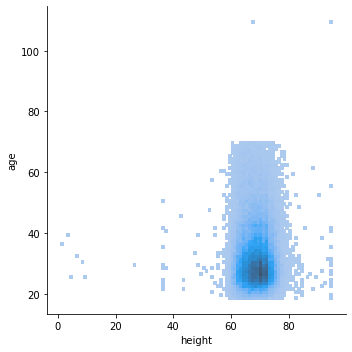

In [96]:
sns.set_palette("tab10")
sns.displot(df_profiles, x='height', y='age', binwidth=(1,1))

<AxesSubplot:xlabel='smokes', ylabel='income'>

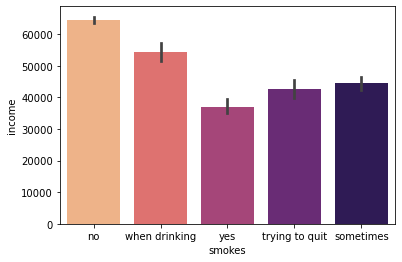

In [81]:
sns.set_palette("magma_r", n_colors = 5)
sns.barplot(x="smokes", y="income", data=df_profiles.loc[income_upper_bound & income_lower_bound])

<AxesSubplot:xlabel='orientation', ylabel='income'>

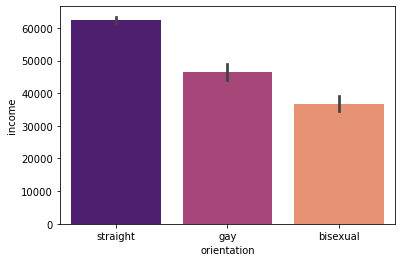

In [92]:
sns.set_palette("magma", n_colors=3)
sns.barplot(x="orientation", y="income", data=df_profiles.loc[income_upper_bound & income_lower_bound])

<AxesSubplot:xlabel='sex', ylabel='income'>

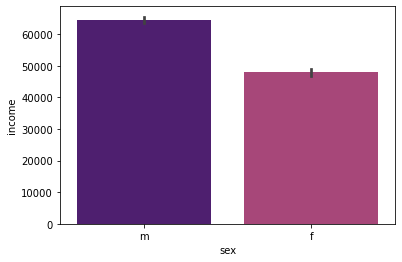

In [89]:
sns.set_palette("magma", n_colors = 3)
sns.barplot(x="sex", y="income", data=df_profiles.loc[income_upper_bound & income_lower_bound])

<AxesSubplot:xlabel='height', ylabel='body_type'>

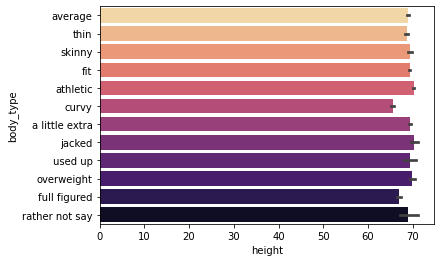

In [74]:
sns.set_palette("magma_r", n_colors = 12)
sns.barplot(x="height", y="body_type", data=df_profiles.loc[income_upper_bound & income_lower_bound])

In [1]:
print('hi')

hi
